
**Problem Statment**:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
The company wants to know :

*     Which variables are significant in predicting the demands for shred bikes.
*     How well those variables describe the bike demands.



In [1]:
# Importing essential Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## **Data Reading,Understanding and Preparation**

In [2]:
# Read and view the Dataset
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Get to know about type of Data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


* We don't need the Feature 'instant',it is just serial number of the dataset.
* We don't need the Feature 'dtday' because it is already expalained by the other features like: yr, mnth, weekday, workingday and holiday.


In [4]:
day = day.drop(['instant','dteday'],axis =1)

#### Feature: season has four levels (1:spring, 2:summer, 3:fall, 4:winter) , so it has to be encoded with the help three dummy variables



In [5]:
season_desc = pd.get_dummies(day['season'])
season_desc.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [6]:
#df.rename(columns = d, inplace = False)
season_desc1 = season_desc.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)
season_desc1.sample(5)


,spring,summer,fall,winter
146,0,1,0,0
143,0,1,0,0
37,1,0,0,0
682,0,0,0,1
477,0,1,0,0


we don't need all four columns we can drop any one column because each of the column can be explained
by remaining three. Let's say we if drop the column 'spring' then let's see how it can be explained by remaining three:

*     000 will corresponds to spring
*     100 will corresponds to summer
*     010 will corresponds to fall
*     001 will corresponds to winter

In [7]:
day = pd.concat((day,season_desc1),axis=1)

In [8]:
day = day.drop(['season','spring'],axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
184,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,0,1,0
97,0,4,0,5,1,2,13.769153,16.22395,83.6250,15.208464,172,1299,1471,1,0,0
523,1,6,0,5,1,1,26.615847,29.89310,46.7917,11.750661,1488,6248,7736,1,0,0
131,0,5,0,4,1,1,21.935000,26.16815,74.7500,12.707689,695,4169,4864,1,0,0
591,1,8,0,3,1,1,28.973347,32.70185,61.9583,11.374657,1198,6149,7347,0,1,0


In [9]:
Month = pd.get_dummies(day['mnth'])
Month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [10]:
Month1 = Month.rename(columns={ 1:'Jan',2:'Feb',3:'March',4:'April',5:'May', \
                               6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)
Month1.sample(5)

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
124,0,0,0,0,1,0,0,0,0,0,0,0
623,0,0,0,0,0,0,0,0,1,0,0,0
295,0,0,0,0,0,0,0,0,0,1,0,0
403,0,1,0,0,0,0,0,0,0,0,0,0
279,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
day = pd.concat((day,Month1),axis=1)
day.sample(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
361,0,12,0,3,1,1,12.264330,13.99870,50.3913,19.695387,...,0,0,0,0,0,0,0,0,0,1
217,0,8,0,6,0,2,29.383347,33.80770,75.5000,15.292750,...,0,0,0,0,0,1,0,0,0,0
497,1,5,0,0,0,1,25.112500,29.26190,57.6250,15.082839,...,0,0,1,0,0,0,0,0,0,0
697,1,11,0,4,1,1,11.515670,14.92110,55.5652,7.739974,...,0,0,0,0,0,0,0,0,1,0
630,1,9,0,0,0,1,21.695847,25.94665,46.7083,14.958286,...,0,0,0,0,0,0,1,0,0,0


* Since any one of the Month can be explained by remaining other 11 Months so we can drop First one i.e. 'Jan'
* As we have already expanded the Levels of of the Feature 'mnth' so we don't need it.

In [12]:
day = day.drop(['mnth','Jan'],axis=1)


In [13]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    int64  
 10  registered  730 non-null    int64  
 11  cnt         730 non-null    int64  
 12  summer      730 non-null    uint8  
 13  fall        730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Feb         730 non-null    uint8  
 16  March       730 non-null    uint8  
 17  April       730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  June        730 non-null    u

#### Understanding the Feature 'holiday'
holiday : weather day is a holiday or not , so this Feature is already encoded to Binary form where
*     1 represents it's Holiday
*     0 represents it's not a Holiday
    

#### Understanding the Feature 'weekday'
weekday : day of the week , so this Feature needs Encoding

It can be encoded as follow:

{1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday',0:'Sunday'}


In [14]:
Weekday = pd.get_dummies(day['weekday'])
Weekday.sample(5)

,0,1,2,3,4,5,6
573,0,0,0,0,0,0,1
443,0,0,1,0,0,0,0
446,0,0,0,0,0,1,0
363,0,0,0,0,0,1,0
462,1,0,0,0,0,0,0


In [15]:
WEEKDAYS = Weekday.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday', \
                                   5:'Friday',6:'Saturday',0:'Sunday'},inplace = False)
WEEKDAYS.sample(7)

,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
497,1,0,0,0,0,0,0
698,0,0,0,0,0,1,0
189,0,0,0,0,0,0,1
617,0,1,0,0,0,0,0
672,1,0,0,0,0,0,0
592,0,0,0,0,1,0,0
141,1,0,0,0,0,0,0


In [16]:
day = pd.concat((day,WEEKDAYS),axis=1)
day.sample(5)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,Oct,Nov,Dec,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
565,1,0,5,1,2,27.299153,30.65125,84.4167,14.000789,747,...,0,0,0,0,0,0,0,0,1,0
467,1,0,5,1,1,18.142500,21.59040,40.8333,10.416557,1252,...,0,0,0,0,0,0,0,0,1,0
489,1,0,6,0,2,25.488347,29.23040,75.6667,10.250464,2496,...,0,0,0,0,0,0,0,0,0,1
61,0,0,4,1,1,8.131653,10.00665,31.8333,15.125518,123,...,0,0,0,0,0,0,0,1,0,0
668,1,0,3,1,2,14.657500,18.05500,66.6667,11.166689,419,...,1,0,0,0,0,0,1,0,0,0


* As we have already Expanded the Feature 'weekday' so we don't need it.
* Since any one of the Weekday can be explained by remaining other 6 Weekdays. so we can drop 'Sunday'

In [17]:
day = day.drop(['weekday','Sunday'],axis=1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Sep,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
415,1,1,0,1,11.480000,13.66955,50.7826,15.348561,502,2627,...,0,0,0,0,1,0,0,0,0,0
94,0,0,1,2,16.980847,19.91750,64.2083,26.000489,167,1628,...,0,0,0,0,0,1,0,0,0,0
683,1,0,1,2,13.188347,16.22460,62.0417,10.250129,320,5125,...,0,0,1,0,0,0,0,1,0,0
632,1,0,1,1,22.550000,27.20895,57.0000,15.833507,845,6693,...,1,0,0,0,0,1,0,0,0,0
647,1,0,1,1,21.080847,25.15710,63.0833,12.584007,780,6911,...,0,1,0,0,0,0,1,0,0,0


#### Understanding the Feature 'workingday'
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0
* As the Feture Working Days is already Binary Encoded so no further Data Preparation is needed.

#### Understanding the Feature 'weathersit'
weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

> Since the Feature 'wethershit' has four levels so we can create  dummy Variables to represent them into Numerical forms and mapping can be done as
1: Clear
2: Mist
3: Light


In [18]:
Weathersit = pd.get_dummies(day['weathersit'])
Weathersit.sample(5)

,1,2,3
52,1,0,0
288,1,0,0
421,1,0,0
709,0,1,0
717,1,0,0


In [19]:
Weathersits = Weathersit.rename(columns = {1:'Clear' ,2: 'Mist' , 3: 'Light'},inplace = False)

In [20]:
day = pd.concat((day,Weathersits), axis =1)
day.sample(5)

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
415,1,1,0,1,11.480000,13.66955,50.7826,15.348561,502,2627,...,0,1,0,0,0,0,0,1,0,0
422,1,0,1,1,15.033347,17.89770,49.0833,17.958211,253,4069,...,0,1,0,0,0,0,0,1,0,0
58,0,0,1,2,16.698193,20.00590,87.6364,19.408962,81,1365,...,0,1,0,0,0,0,0,0,1,0
123,0,0,1,2,16.980847,20.23250,73.7083,22.042732,255,2378,...,0,0,0,1,0,0,0,0,1,0
80,0,0,1,1,18.108347,22.03210,62.4583,15.125250,460,2243,...,0,0,1,0,0,0,0,1,0,0


In [21]:
# As we don't need the Feature 'weathersit' now as we have already expanded so we can drop it
day = day.drop('weathersit',axis=1)


In [22]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    uint8  
 11  fall        730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  March       730 non-null    uint8  
 15  April       730 non-null    uint8  
 16  May         730 non-null    uint8  
 17  June        730 non-null    uint8  
 18  July        730 non-null    uint8  
 19  Aug         730 non-null    u

> Features such as 'temp','atemp','hum','windspeed','casual','register','cnt'and integers and it is expected them
to be as integers only.

> The Feature 'cnt' represents count of total rental bikes including both casual and registered and it is the Target variable.

## **Data Visualization**

In [23]:
# Visualization of Data Statistics 
day.describe().T.style.background_gradient(cmap = 'coolwarm',axis=1).set_precision(2)

,count,mean,std,min,25%,50%,75%,max
yr,730.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00
holiday,730.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,730.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
temp,730.00,20.32,7.51,2.42,13.81,20.47,26.88,35.33
atemp,730.00,23.73,8.15,3.95,16.89,24.37,30.45,42.04
hum,730.00,62.77,14.24,0.00,52.00,62.62,72.99,97.25
windspeed,730.00,12.76,5.20,1.50,9.04,12.13,15.63,34.00
casual,730.00,849.25,686.48,2.00,316.25,717.00,1096.50,3410.00
registered,730.00,3658.76,1559.76,20.00,2502.25,3664.50,4783.25,6946.00
cnt,730.00,4508.01,1936.01,22.00,3169.75,4548.50,5966.00,8714.00


From Above Numerical Feature Description we have following observation:

* > some of the Columns may have outliers like 'casual'
* > Data are not uniform across all the features hence it need to be Scaled so that the Interpreation can be done well
* > MinMax Scaling can be used as it take care of Outliers in the Data


    

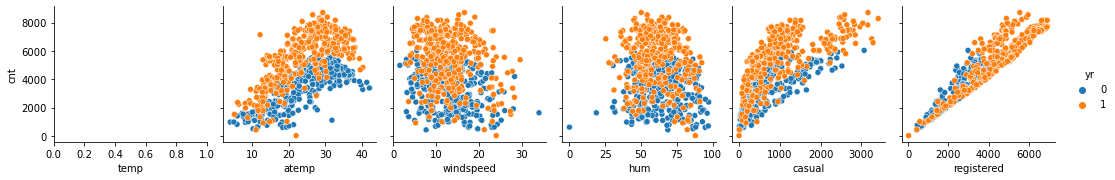

In [24]:
# Visualization of Relationship of Numerical Features against Target Variable
sns.pairplot(day, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'],hue ='yr')
plt.show()


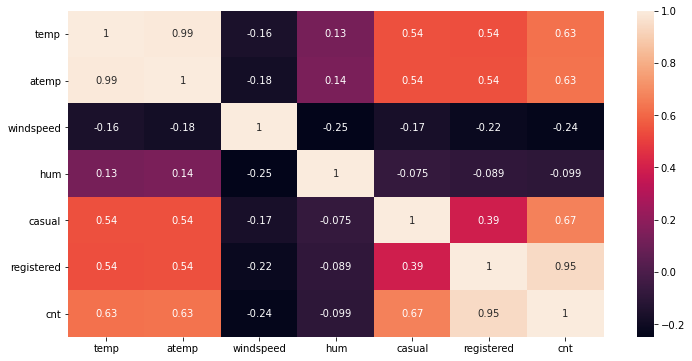

In [25]:
plt.figure(figsize = (12,6))
sns.heatmap(day[["temp",'atemp', 'windspeed',"hum",'casual','registered','cnt']].corr(),annot =True)
plt.show()

From Above two plot below are the observations:
* > Registered Bike users are more than Casual and is strongly correlated with Target Variable
* > Temp and atemp are very strongly correlated one can be dropped
* > Humidity has not much Negative effect on the Target Variable.
* > Since after a user rented a Bike only we can determine He or She has registered or Casually done so both the Features are actually Target Feature
    Since we have already a Target Feature we can drop these two.


In [26]:
day = day.drop(['atemp','casual','registered'],axis =1)

In [27]:
day.groupby(['Clear', 'Mist','Light','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

Clear  Mist  Light  summer  fall  winter
1      0     0      0       1     0         5878.257353
                    1       0     0         5548.548673
0      1     0      0       1     0         5222.479167
1      0     0      0       0     1         5043.563107
0      1     0      0       0     1         4654.000000
                    1       0     0         4236.705882
1      0     0      0       0     0         2811.135135
0      0     1      0       1     0         2751.750000
       1     0      0       0     0         2365.215385
       0     1      0       0     1         1961.600000
                    1       0     0         1169.000000
                    0       0     0          934.750000
Name: cnt, dtype: float64

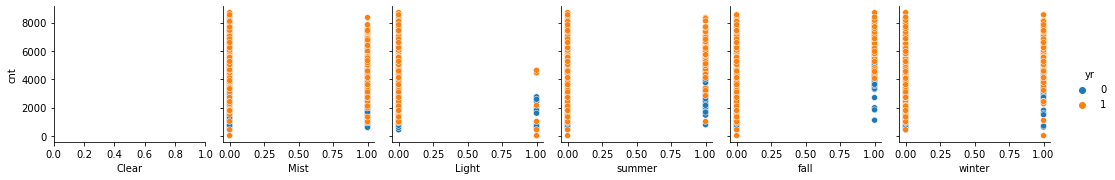

In [28]:
sns.pairplot(day,x_vars =['Clear', 'Mist','Light','summer','fall','winter'],y_vars='cnt',hue ='yr')
plt.show()

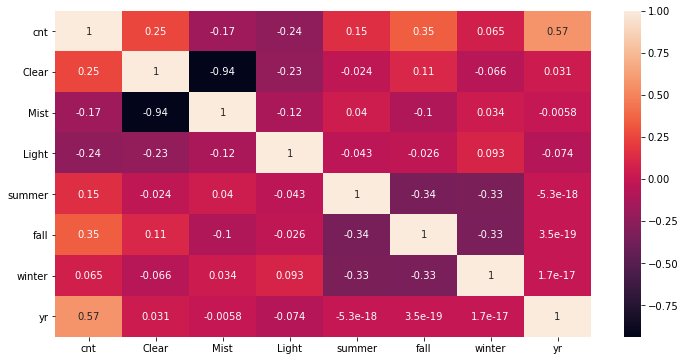

In [29]:
plt.figure(figsize = (12,6))
sns.heatmap(day[['cnt','Clear', 'Mist','Light','summer','fall','winter','yr']].corr(),annot =True)
plt.show()

In [30]:
day.groupby(['summer','fall','winter','Feb','March','April','May','June', \
             'July' ,'Aug','Sep','Oct','Nov','Dec'])['cnt'].mean().sort_values(ascending = False)

summer  fall  winter  Feb  March  April  May  June  July  Aug  Sep  Oct  Nov  Dec
0       0     1       0    0      0      0    0     0     0    1    0    0    0      6024.500000
1       0     0       0    0      0      0    1     0     0    0    0    0    0      5773.850000
0       1     0       0    0      0      0    1     0     0    0    0    0    0      5769.400000
                                              0     0     0    1    0    0    0      5672.704545
                                                          1    0    0    0    0      5664.419355
                                                    1     0    0    0    0    0      5563.677419
1       0     0       0    0      0      1    0     0     0    0    0    0    0      5349.774194
0       0     1       0    0      0      0    0     0     0    0    1    0    0      5199.225806
1       0     0       0    0      1      0    0     0     0    0    0    0    0      4484.900000
0       0     1       0    0      0      0   

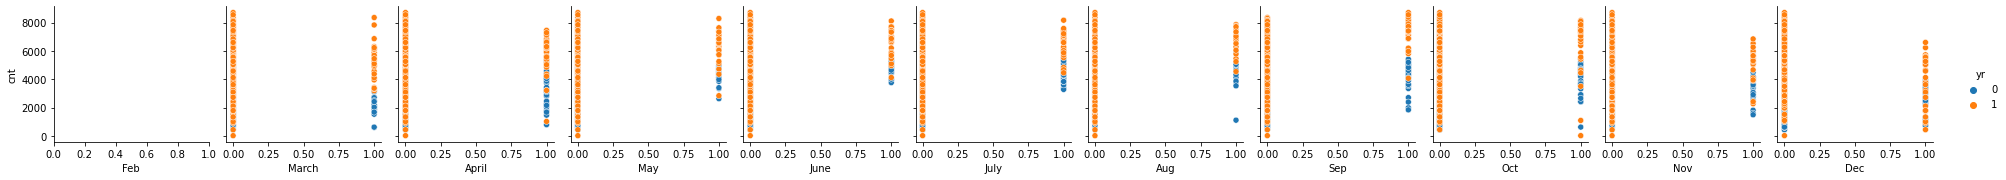

In [31]:
sns.pairplot(day,x_vars =['Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec'],y_vars='cnt',hue ='yr')
plt.show()

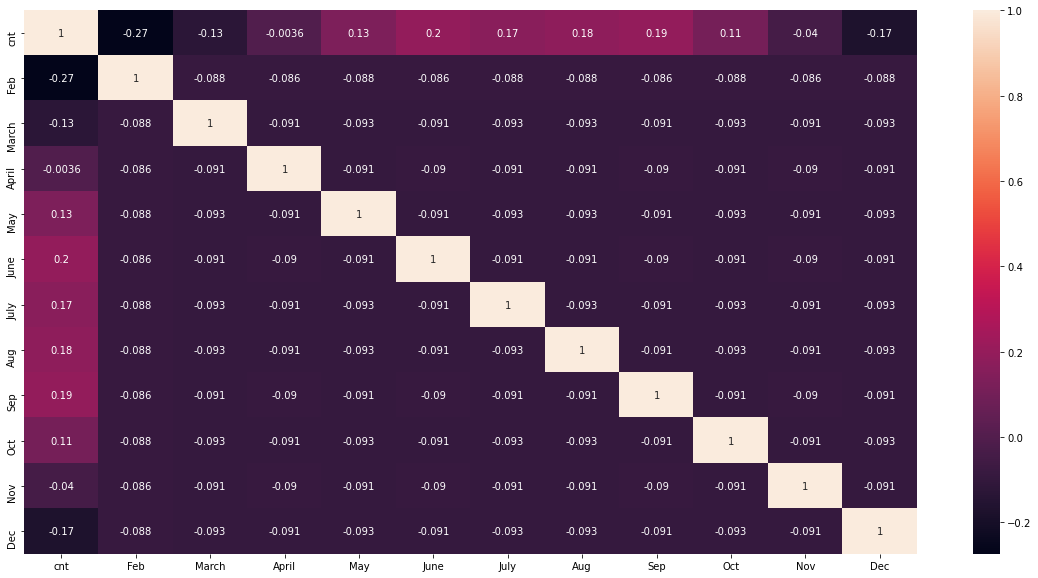

In [32]:
plt.figure(figsize = (20,10))
sns.heatmap(day[['cnt','Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec']].corr(),annot = True)
plt.show()

* > Most number of the Bike has been rented in the Year 2019 in the Month of September However in the just previous Year it was in the June Month.

* > Basically in the Winter Season BOOM Bikes can expect more number demand for Rent of Bikes.

In [33]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'Feb', 'March', 'April', 'May', 'June',
       'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Monday', 'Tuesday',
       'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Clear', 'Mist',
       'Light'],
      dtype='object')

In [34]:
day.groupby(['holiday', 'workingday','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

holiday  workingday  summer  fall  winter
0        1           0       1     0         5718.114504
1        0           0       1     0         5707.750000
0        0           0       1     0         5457.075472
                     1       0     0         5160.365385
         1           1       0     0         4926.664062
1        0           1       0     0         4909.250000
0        1           0       0     1         4785.611570
         0           0       0     1         4674.549020
1        0           0       0     1         4025.333333
0        1           0       0     0         2788.495798
         0           0       0     0         2330.888889
1        0           0       0     0         1687.857143
Name: cnt, dtype: float64

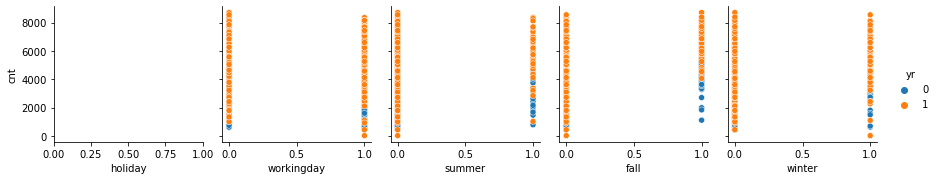

In [35]:
sns.pairplot(day,x_vars =['holiday', 'workingday','summer','fall','winter'],y_vars='cnt',hue ='yr')
plt.show()

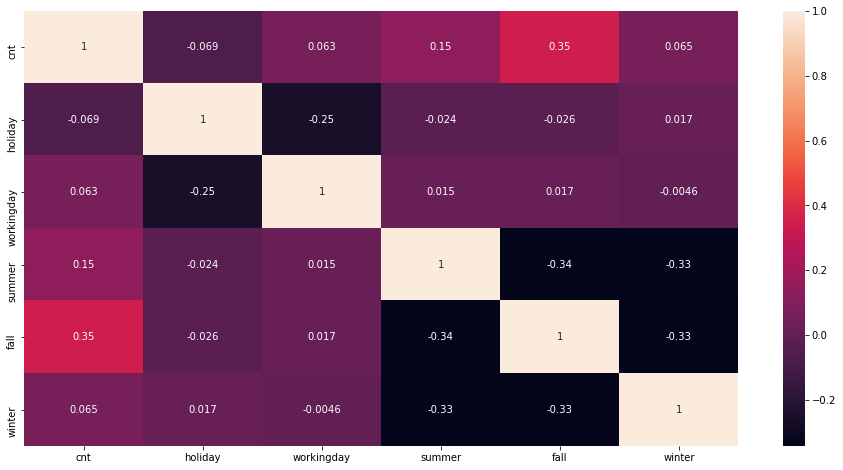

In [36]:
plt.figure(figsize = (16,8))
sns.heatmap(day[['cnt','holiday', 'workingday','summer','fall','winter']].corr(),annot = True)
plt.show()

> **Most of the Bike has been rented during the weekdays**

> **Users Prefer to Rent Bike if the Environment is Clear**

> **Rent of bike is least on the Holiday**

> **More Number of Bike has been rented in the year 2019 than last year (2018) , it shows BOOM Bikes are doing Good Business.**

## **Data Modelling**

In [37]:
# Splitting the Data into Training and Testing Sets
df_train,df_test = train_test_split(day,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [38]:
# As we saw that Data we were unfiform across the all the Features hence Scaling is Required.
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0
fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
winter,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0


> **We can see MinMax Scaling has been done properly for the Training Data as the Minimum
value is 0 for each of the Feature and Maximum value is 1 for each of the Feature**

In [39]:
# Preparation of Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 29)


166    0.430856
447    0.385412
537    0.667395
257    0.418431
96     0.358836
Name: cnt, dtype: float64

#### *Feature Selection using RFE(Recursive Feature Elimination)*

In [40]:
# Running RFE with the Output Number of variables equals to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
# Running RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('Feb', False, 7),
 ('March', False, 3),
 ('April', False, 5),
 ('May', False, 4),
 ('June', False, 6),
 ('July', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 10),
 ('Monday', False, 11),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('Thrusday', False, 15),
 ('Friday', False, 13),
 ('Saturday', True, 1),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Light', True, 1)]

In [42]:
# RFE Selected Features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Oct', 'Saturday', 'Clear', 'Mist', 'Light'],
      dtype='object')

In [43]:
# Features Rejected by the RFE
X_train.columns[~(rfe.support_)]

Index(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec',
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday'],
      dtype='object')

***Building Model using statsmodels for the detailed statistics***

In [44]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]

In [45]:
# Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          8.70e-192
Time:                        00:14:12   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0701      0.025      2.765      0.006       0.020       0.120
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
Saturday       0.0527      0.015      3.627      0.000       0.024       0.081
Clear          0.1246      0.009     14.641      0.000       0.108       0.141
Mist           0.0679      0.011      5.937      0.000       0.045       0.090
Light         -0.1224      0.022     -5.604      0.000      -0.165      -0.079
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     1.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

> As the Statistics Report say there is strong multicollinearity problems so we need to check for VIF

In [46]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,Clear,inf
14,Mist,inf
15,Light,inf
3,workingday,1.88
5,hum,1.87
12,Saturday,1.79
8,winter,1.71
4,temp,1.59
11,Oct,1.49
9,Aug,1.46


In [47]:
# As VIF is Infnity for the Feature 'Clear' so we can drop it 
X_train_rfe = X_train_rfe.drop('Clear',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'Aug', 'Sep', 'Oct', 'Saturday', 'Mist', 'Light'],
      dtype='object')

In [48]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          8.70e-192
Time:                        00:14:13   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.029      6.769      0.000       0.138       0.251
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
Saturday       0.0527      0.015      3.627      0.000       0.024       0.081
Mist          -0.0568      0.010     -5.482      0.000      -0.077      -0.036
Light         -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Again Checking the VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,53.47
3,workingday,1.88
5,hum,1.87
12,Saturday,1.79
8,winter,1.71
4,temp,1.59
13,Mist,1.56
11,Oct,1.49
9,Aug,1.46
7,summer,1.38


In [50]:
X_train_rfe.shape

(510, 15)

>  **We have Prob(F-statistic) is very low Which tells Overall model is a good Fit.**

>  **We got quite Good Adjusted R2 Score i.e 84.3%** 

>  **All the P Value are less than 0.05, Which say that all the 14 Features are Statistically Significant**

>  **Hence we can go ahaed with the current Model for Prediction and Evaluation.**

## **Residual Analysis**

In [51]:
# Calculation of Error in Prediction for Training Data
y_train_pred = lr_model.predict(X_train_sm)
res = (y_train - y_train_pred)

### *Looking for the Assumption : Normality*

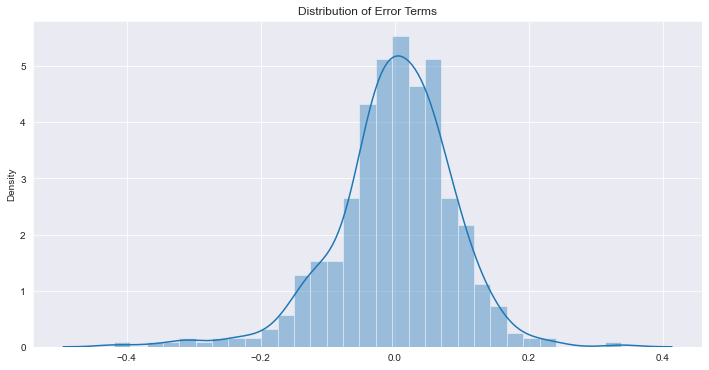

In [52]:
# Ploting of Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

> **We can see Error Terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality**.

### *Looking for patterns in the residuals*

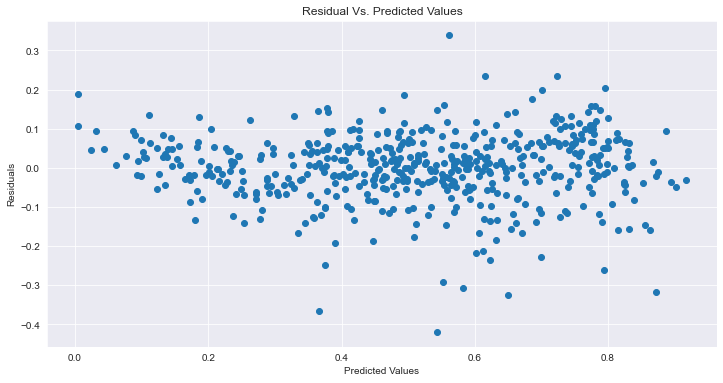

In [53]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

> **We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say
Error terms are independent of each other.** 

### *Looking for Constant Variance*

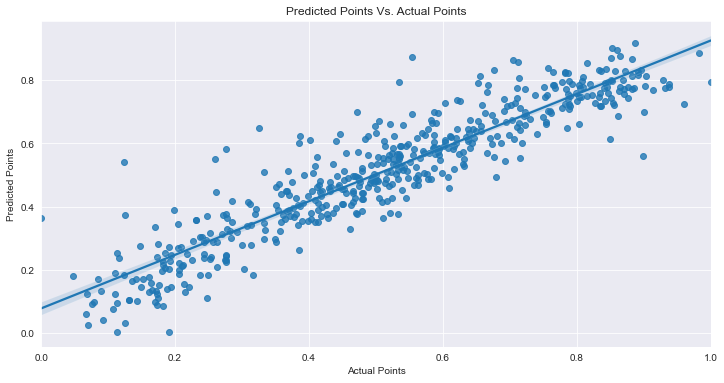

In [54]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

> **We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity**

## **Model Evaluation on Test Dataset**

#### *Applying the MinMax scaling on the test sets*

In [55]:
num_vars = ['temp', 'windspeed',"hum",'cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,1,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,1,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,1,0,...,0,0,0,1,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [56]:
#Dropping the Features which were eliminated during the Training Process
X_test_sm = X_test_sm.drop(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec', \
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday','Clear'],axis=1)

# Predict the Price for Test Data using the Trainned Model
y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.sample(5)

198    0.509874
133    0.401718
153    0.568370
400    0.329534
408    0.453974
dtype: float64

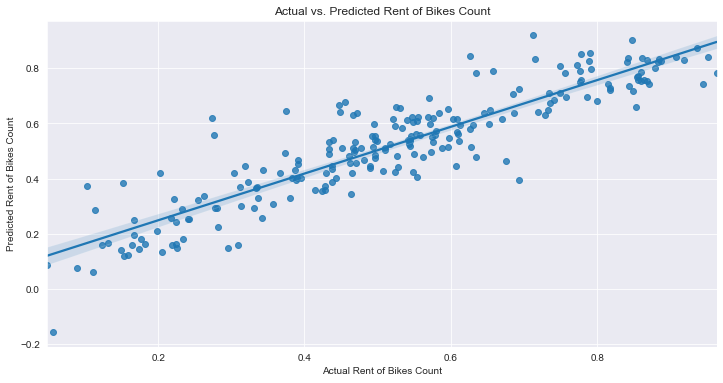

In [57]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

> ***Above Scatter Plot Shows the Linear Relationship between Actual Rent of Bikes Count and Predicted Rent of Bikes Count.***

In [58]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_test_pred)

0.8149002944843474

> **The Final Model accuray is around 81.5%, Which is a Good Score.**

> **The Model accuracy difference between the Train and Test Data is less than 3% which is acceptable.**



In [59]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          0.53
yr            0.23
const         0.19
Sep           0.13
winter        0.13
summer        0.10
Aug           0.06
Saturday      0.05
Oct           0.04
workingday    0.04
Mist         -0.06
holiday      -0.06
hum          -0.17
windspeed    -0.19
Light        -0.25
dtype: float64

In [60]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.53 * temp + 0.23 * yr + 0.19 * const + 0.13 * Sep + 0.13 * winter + 0.1 * summer + 0.06 * Aug + 0.05 * Saturday + 0.04 * Oct + 0.04 * workingday + -0.06 * Mist + -0.06 * holiday + -0.17 * hum + -0.19 * windspeed + -0.25 * Light + 

> **Equation of Best Fit Line :**

> **cnt = 0.53 * temp + 0.23 * yr  + 0.13 * winter + 0.13 * Sep + 0.1 * summer + 0.06 * Aug + 0.05 * Saturday + 0.04 * workingday + 0.04 * Oct - 0.06 * holiday - 0.06 * Mist - 0.17 * hum - 0.19 * windspeed - 0.25 * Light + 0.19**

## ***Insights:*** 

> **Temperature is the Most Significant Feature which affects the Business positively,**  
 
> **Whereas  the other Environmental condition such as Raining, Humidity, Windspeed and Cloudy affects the Business negatively.**
 

> **Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.** 



> **The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.** 


> **It is interesting to see Specially Saturday People like to Rent a Bike more than other usual Days** 
   

> **Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.** 


> **Even though without expending a single cent BOOM Bikes can expect their business to grow by 19%**